# Laboratório 1 -  Turma 22 - 23/08/2021

## Henrique Martinez Rocamora (9836332)
## Flávio Ferreira Menten (9836691)
## Diogo Vieira (9836200)
## Pedro Henrique Campos Dini (10772797)

## Parte A

Foi escolhido o exercício A3

###  **Determinar analiticamente a expansão em série de Fourier.**

A função apresentada tem período $T_0$ e é ímpar.

Sendo assim, $a_0$ = 0 e $a_k$ = 0.

Podemos então calcular $b_k$:

$$b_k = \frac{2}{T}\int_{0}^{T} x(t) \sin(k \omega_0 t) dt$$

$$b_k = \frac{2}{T_0}\left[\int_{0}^{T_0/4} \frac{4a}{T_0}t \sin(k \omega_0 t) dt + \int_{T_0/4}^{3T_0/4} (-\frac{4a}{T_0}t + 2a) \sin(k \omega_0 t) dt + \int_{3T_0/4}^{T_0} (\frac{4a}{T_0}t - 4a) \sin(k \omega_0 t) dt\right]$$

$$b_k = \frac{8a}{T_0}\left[\int_{0}^{T_0/4} \frac{2}{T_0}t \sin(k \omega_0 t) dt + \int_{T_0/4}^{T_0/2} (-\frac{2}{T_0}t + 1) \sin(k \omega_0 t) dt\right]$$

Sendo $L = T_0 / 2$

$$b_k = \frac{4a}{L}\left[\int_{0}^{L/2} \frac{1}{L}t \sin(k \omega_0 t) dt + \int_{L/2}^{L} (-\frac{1}{L}t + 1) \sin(k \omega_0 t) dt\right]$$

$$b_k = \frac{4a}{L}\left[\int_{0}^{L/2} \frac{1}{L}t \sin(k \frac{\pi}{L} t) dt + \int_{L/2}^{L} (-\frac{1}{L}t + 1) \sin(k \frac{\pi}{L} t) dt\right]$$

Mudando $\theta = \frac{2\pi}{L} t$

$$b_k = \frac{4a}{L}\left[\int_{0}^{\pi} \frac{\theta}{2\pi} \sin(k \frac{\theta}{2}) \frac{L}{2\pi}d\theta + \int_{\pi}^{2\pi} (-\frac{\theta}{2\pi} + 1) \sin(k \frac{\theta}{2}) \frac{L}{2\pi}d\theta \right]$$

$$b_k = \frac{4a}{L}\left[\int_{0}^{\pi} \frac{\theta}{2\pi} \sin(k \frac{\theta}{2}) \frac{L}{2\pi}d\theta + \int_{\pi}^{2\pi} (-\frac{\theta}{2\pi} + \frac{2\pi}{2\pi}) \sin(k \frac{\theta}{2}) \frac{L}{2\pi}d\theta \right]$$

$$b_k = \frac{a}{\pi^2}\left[\int_{0}^{\pi}\theta \sin(k \frac{\theta}{2}) d\theta + \int_{\pi}^{2\pi} (-\theta + 2\pi) \sin(k \frac{\theta}{2}) d\theta \right]$$

$$b_k = \frac{a}{k^2 \pi^2}\left[ 4\sin(\frac{\pi k}{2}) - 2 \pi k \cos(\frac{\pi k}{2}) + 4 \sin(\frac{\pi k}{2}) - 4 \sin(\pi k) + 2 \pi k \cos(\frac{\pi k}{2})\right]$$

$$ = \frac{a}{k^2 \pi^2}\begin{cases}
0 \text{ se k = 0, 4, 8, ...} \\
8 \text{ se k = 1, 5, 9, ...} \\
0 \text{ se k = 2, 6, 10, ...} \\
-8 \text{ se k = 3, 7, 11, ...}
\end{cases}$$

###  **Montar o gráfico do espectro de amplitude e o espectro de fase.**

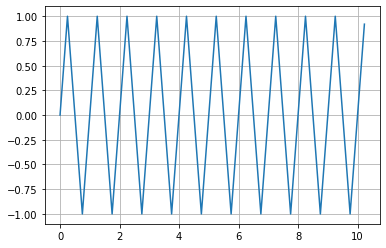

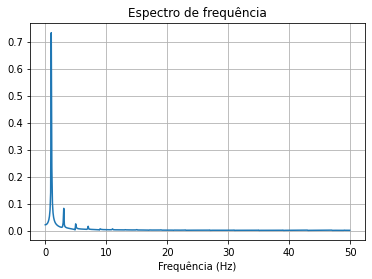

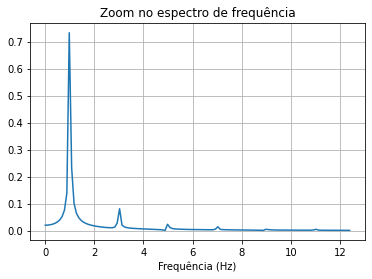

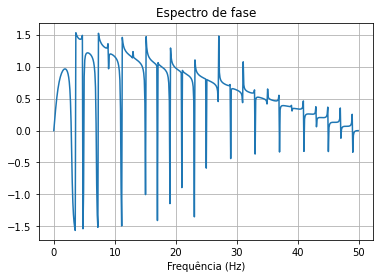

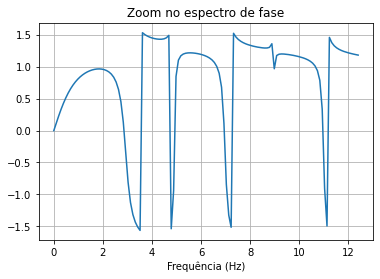

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq
from scipy import signal

# Number of sample points
N = 1024

# sample spacing
T = 0.01

# Vetor de tempo

t = np.linspace(0.0,N*T,N, endpoint=False)

# Gerando a função por fourier 
y = np.zeros(len(t))
a = 1
To = 1

for i in range(len(t)):
    for k in range(100):
        if k//2!=0:
            factor = 8*a/((np.pi*k)**2)*((-1)**((k-1)//2))
            y[i]+= factor*np.sin(k*np.pi*t[i]/(To))

#plt.plot(t,y)

# Gerando a função diretamente
y = a*signal.sawtooth(2 *np.pi * (t+To/4) / To, width=.5)

plt.plot(t,y)
plt.grid()
plt.show()

# Efetuando a transformada 

yf = fft(y)

xf = fftfreq(N, T)[:N//2]

# Espectro de frequencia   
plt.plot(xf,2.0/N *np.abs(yf[0:N//2]))
plt.xlabel('Frequência (Hz)')
plt.title('Espectro de frequência')
plt.grid()
plt.show()

# Zoom Espectro de frequencia   
plt.plot(xf[0:128],2.0/N *np.abs(yf[0:128]))
plt.xlabel('Frequência (Hz)')
plt.title('Zoom no espectro de frequência')
plt.grid()
plt.show()

# Espectro de Fase
plt.plot(xf[0:N//2],np.arctan(-np.imag(yf[0:N//2])/np.real(yf[0:N//2])))
plt.xlabel('Frequência (Hz)')
plt.title('Espectro de fase')
plt.grid()
plt.show()

# Zoom  no Espectro de Fase
plt.plot(xf[0:128],np.arctan(-np.imag(yf[0:128])/np.real(yf[0:128])))
plt.xlabel('Frequência (Hz)')
plt.title('Zoom no espectro de fase')
plt.grid()
plt.show()
    

###  **O que aconteceria a esses espectros se à função fosse adicionada uma constante $a$ ?**

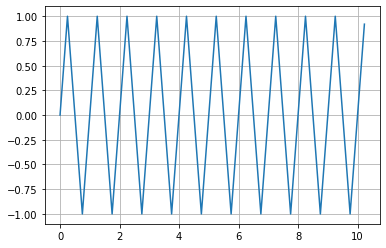

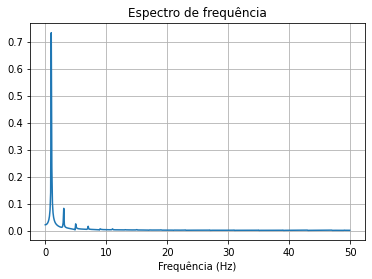

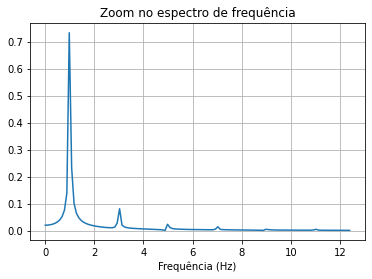

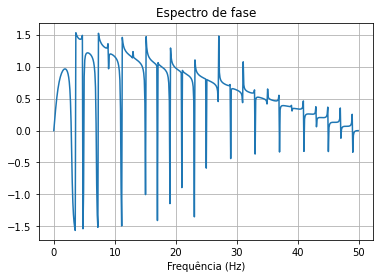

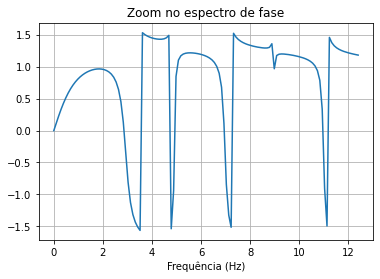

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq
from scipy import signal

# Number of sample points
N = 1024

# sample spacing
T = 0.01

# Vetor de tempo

t = np.linspace(0.0,N*T,N, endpoint=False)

# Gerando a função por fourier 
y = np.zeros(len(t))
a = 1
To = 1

for i in range(len(t)):
    for k in range(100):
        if k//2!=0:
            factor = 8*a/((np.pi*k)**2)*((-1)**((k-1)//2))
            y[i]+= factor*np.sin(k*np.pi*t[i]/(To))

#plt.plot(t,y)

# Gerando a função diretamente
y = a*signal.sawtooth(2 *np.pi * (t+To/4) / To, width=.5)

plt.plot(t,y)
plt.grid()
plt.show()

# Efetuando a transformada 

yf = fft(y)

xf = fftfreq(N, T)[:N//2]

# Espectro de frequencia   
plt.plot(xf,2.0/N *np.abs(yf[0:N//2]))
plt.xlabel('Frequência (Hz)')
plt.title('Espectro de frequência')
plt.grid()
plt.show()

# Zoom Espectro de frequencia   
plt.plot(xf[0:128],2.0/N *np.abs(yf[0:128]))
plt.xlabel('Frequência (Hz)')
plt.title('Zoom no espectro de frequência')
plt.grid()
plt.show()

# Espectro de Fase
plt.plot(xf[0:N//2],np.arctan(-np.imag(yf[0:N//2])/np.real(yf[0:N//2])))
plt.xlabel('Frequência (Hz)')
plt.title('Espectro de fase')
plt.grid()
plt.show()

# Zoom  no Espectro de Fase
plt.plot(xf[0:128],np.arctan(-np.imag(yf[0:128])/np.real(yf[0:128])))
plt.xlabel('Frequência (Hz)')
plt.title('Zoom no espectro de fase')
plt.grid()
plt.show()
    

Ao adicionar uma constante à função , os parâmetros $a_k$ e $b_k$ não variam, mas $a_0$ é acrescentada de $a$.

###  **O que aconteceria a esses espectros se a função fosse deslocada temporalmente para a direita de um tempo $T_0/4$ ?**

Ao deslocar para a direita de um tempo $T_0/4$, a função deixa de ser ímpar. 

A continuar

###  **O que aconteceria a esses espectros se uma constante b fosse multiplicada pela função?**

Ao multiplicar por uma constante $b$, a função $b x(t)$ continua ímpar, e então $a_0$ e $a_k$ permanecem nulos, entretanto, $b_k$ não permanece igual, esses coeficientes são multiplicados por $b$.

## Parte B

A parte B desse laboratório discorre sobre análise de sinais. Para realizá-la, primeiramente obteve-se um sinal. O registro foi feito posicionando um celular sobre o filtro de ar do motor de um Fusca (1994). Na imagem abaixo, a marcação azul indica onde o celular foi posicionado, que cqptou o sinql qtravés do aplicativo Phiphox. O objetivo das etapas seguintes é explorar esse sinal, tratando-o de forma a permitir a interpretação dos comportamentos físicos registrados. 

![Motor](motor-img2.png)

### **Realizar um registro que permita gerar um espectro médio com resolução de 0,2 Hz**

A frequência de resolução na FFT é definida por $f_s/N$ onde $f_s$ é a frequência de amostragem e $N$ o número de amostras. O gráfico abaixo mostra o sinal completo obtido e, em seguida, apenas uma secção dele. 

<AxesSubplot:xlabel='Time (s)'>

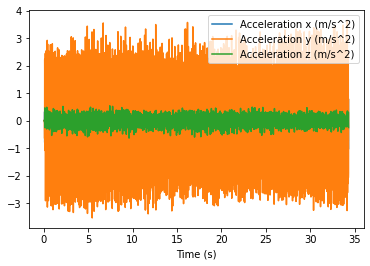

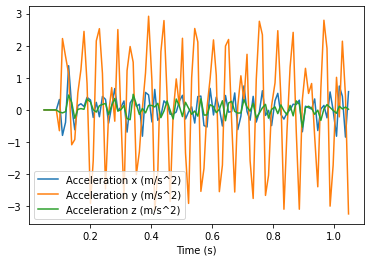

In [38]:
import pandas as pd

df = pd.read_csv("motor_fusca.csv") 

df.plot(x="Time (s)", y=["Acceleration x (m/s^2)","Acceleration y (m/s^2)","Acceleration z (m/s^2)"], kind="line")

df_part = df.head(100)

df_part.plot(x="Time (s)", y=["Acceleration x (m/s^2)","Acceleration y (m/s^2)","Acceleration z (m/s^2)"], kind="line")

### **Qual o número de pontos amostrais necessários?**

$$N = \frac{f_s}{\text{resolução}}= \frac{f_s}{\text{0.2}}$$

Como a frequência de amostragem utilizada no experimento foi de $f_s$ = 100 Hz, $N$ = 500 amostras. Como usualmente devemos escolher potências de 2, para essa análise utilizaremos $N$ = 1024.

### **Quantas médias são necessárias para caracterizar o seu sinal?**

Para esta análise, vamos primeiramente observar o sinal no domínio das frequências. Assim, poderemos determinar qual o eixo de interesse e se existe a necessidade de realizar médias. 

In [39]:
from scipy import signal
from scipy.fft import fft, fftshift, fftfreq
from scipy.signal import hann, flattop, boxcar

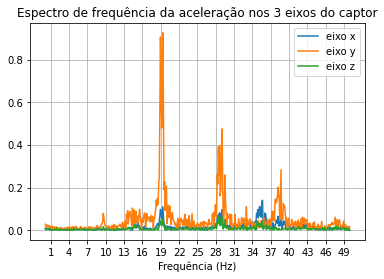

In [40]:
# Sampling frequency
f_s = 100 # [Hz]
# Number of sample points
N = 1024
# sample spacing
T = 1.0 / f_s

x = df['Time (s)'].to_list()[:N]
xf = fftfreq(N, T)[:N]

y_x = df['Acceleration x (m/s^2)'].to_list()[:N]
yf_x = fft(y_x)

y_y = df['Acceleration y (m/s^2)'].to_list()[:N]
yf_y = fft(y_y)

y_z = df['Acceleration z (m/s^2)'].to_list()[:N]
yf_z = fft(y_z)

# graph
plt.plot(xf[1:N//2],2.0/N *np.abs(yf_x[1:N//2]))
plt.plot(xf[1:N//2],2.0/N *np.abs(yf_y[1:N//2]))
plt.plot(xf[1:N//2],2.0/N *np.abs(yf_z[1:N//2]))
plt.title('Espectro de frequência da aceleração nos 3 eixos do captor')
plt.xlabel('Frequência (Hz)')
plt.legend(['eixo x', 'eixo y', 'eixo z'])
plt.xticks(range(1, 50, 3))
plt.grid()
plt.show()

Vê-se, a partir deste ultimo gráfico, que a direção de interesse de análise é a direção do eixo y. Também, pode-se ver que existem 3 picos bem definidos de frequência, não tendo assim necessidade de efetuar médias para caracterizar o sinal. O sinal já pode ser adequadamente caracterizado e o nível de ruído não atrapalha a compreensão.

### **Compare o resultado utilizando as janelas Hann, Flat Top e Retangular.**

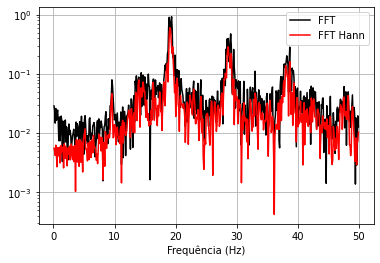

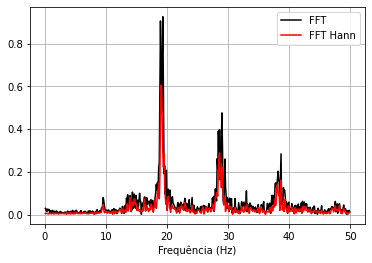

In [41]:
# hann
y= y_y
yf = yf_y
w_hann = hann(N)
ywf_hann = fft(y*w_hann)

plt.semilogy(xf[1:N//2], 2.0/N * np.abs(yf[1:N//2]), '-k')
plt.semilogy(xf[1:N//2], 2.0/N * np.abs(ywf_hann[1:N//2]), '-r')

plt.legend(['FFT', 'FFT Hann'])
plt.xlabel('Frequência (Hz)')
plt.grid()
plt.show()

plt.plot(xf[1:N//2], 2.0/N * np.abs(yf[1:N//2]), '-k')
plt.plot(xf[1:N//2], 2.0/N * np.abs(ywf_hann[1:N//2]), '-r')

plt.legend(['FFT', 'FFT Hann'])
plt.xlabel('Frequência (Hz)')
plt.grid()
plt.show()

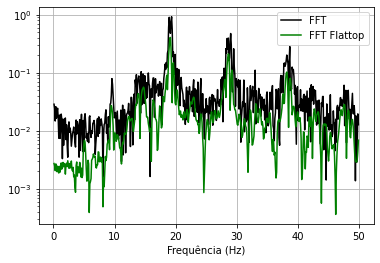

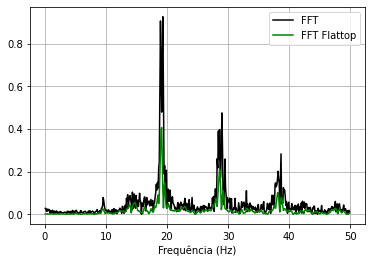

In [42]:
# flattop
w_flattop = flattop(N)
ywf_flattop = fft(y*w_flattop)

plt.semilogy(xf[1:N//2], 2.0/N * np.abs(yf[1:N//2]), '-k')
plt.semilogy(xf[1:N//2], 2.0/N * np.abs(ywf_flattop[1:N//2]), '-g')
plt.legend(['FFT', 'FFT Flattop'])
plt.xlabel('Frequência (Hz)')
plt.grid()
plt.show()

plt.plot(xf[1:N//2], 2.0/N * np.abs(yf[1:N//2]), '-k')
plt.plot(xf[1:N//2], 2.0/N * np.abs(ywf_flattop[1:N//2]), '-g')
plt.legend(['FFT', 'FFT Flattop'])
plt.xlabel('Frequência (Hz)')
plt.grid()
plt.show()

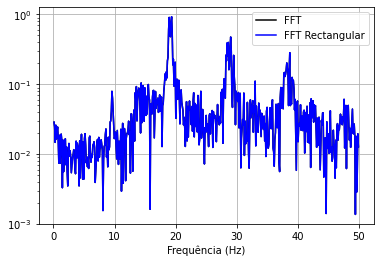

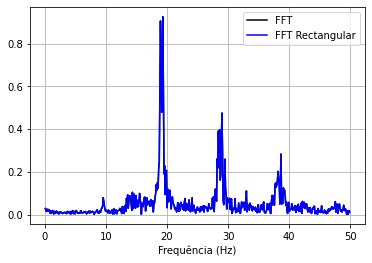

In [43]:
# rectangular
w_boxcar = boxcar(N)
ywf_boxcar = fft(y*w_boxcar)

plt.semilogy(xf[1:N//2], 2.0/N * np.abs(yf[1:N//2]), '-k')
plt.semilogy(xf[1:N//2], 2.0/N * np.abs(ywf_boxcar[1:N//2]), '-b')
plt.legend(['FFT', 'FFT Rectangular'])
plt.xlabel('Frequência (Hz)')
plt.grid()
plt.show()

plt.plot(xf[1:N//2], 2.0/N * np.abs(yf[1:N//2]), '-k')
plt.plot(xf[1:N//2], 2.0/N * np.abs(ywf_boxcar[1:N//2]), '-b')
plt.legend(['FFT', 'FFT Rectangular'])
plt.xlabel('Frequência (Hz)')
plt.grid()
plt.show()

### **Interprete o sinal de vibração e explique o funcionamento do equipamento.**

Primeiramente, observa-se na imagem abaixo o espectro de frequências no eixo y, eixo que coicide com a direção dos cilindros do motor, já que é um motor boxer, e também a direção que apresenta as maiores amplitudes de vibração. Utiliza-se nessa figura uma escala linear e também a janela Hann, que, através do exercício anterior, vê-se que ela é capaz de reduzir ligeiramente os ruidos. Assim, pode-se obter as frequências que se destacam nesse espectro. 

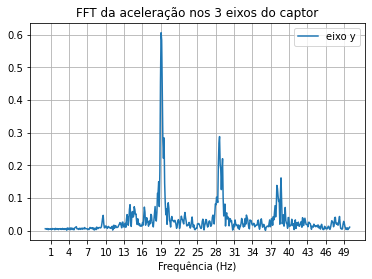

In [44]:
plt.plot(xf[1:N//2], 2.0/N * np.abs(ywf_hann[1:N//2]))
plt.title('FFT da aceleração nos 3 eixos do captor')
plt.xlabel('Frequência (Hz)')
plt.legend(['eixo y'])
plt.xticks(range(1, 50, 3))
plt.grid()
plt.show()

Como observado na imagem acima, tem-se 3 picos de frquência:

$\omega_1 = 19Hz$

$\omega_2 = 28,5Hz$

$\omega_3 = 38Hz$

Como o espectro de frequência traduz o comportamento mecânico do sistema, pode-se relacionar essas frequências à velocidade de rotação do motor. Como se trata de um motor 4 tempos, a frequência induzida pelo curso dos pares de pistão se movimentando alterndamente é o dobro da velocidade de rotação do eixo motor. Portanto, tem-se:

$\omega_{motor}=19/2= 9,5Hz= 570rpm$

Esse valor de rotação de marcha lenta pode ser validado com a seguinte tabela, retirada do site da QuatroRodas (https://quatrorodas.abril.com.br/noticias/o-primeiro-e-mais-completo-teste-com-o-vw-fusca-quatro-rodas-60-anos/).

![Tabela_motor](motor-tabela.png).

